In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mehradaria/leukemia")

print("Path to dataset files:", path)



100%|██████████| 110M/110M [00:02<00:00, 51.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import tensorflow as tf
import keras
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [ ]:
code = {
    'Benign': 0,
    'Early': 1,  # Added 'Early' class
    'Pre': 2,    # Add more classes if needed
    'Pro': 3
}

def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

In [ ]:
s=224
import cv2
from tqdm import tqdm
import os

In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Original/Benign"

X_train = []
y_train = []
code = {'Benign': 0}  # Ensure 'code' dictionary is defined properly

for img in tqdm(os.listdir(dataset_path)):
    image = cv2.imread(os.path.join(dataset_path, img), 1)
    image_array = cv2.resize(image, (s, s))
    X_train.append(image_array)  # No need to convert to list explicitly
    y_train.append(code['Benign'])

100%|██████████| 504/504 [00:00<00:00, 546.07it/s]


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mehradaria/leukemia")

print("Path to dataset files:", path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import tensorflow as tf
import keras
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# Define class encoding properly
code = {
    'Benign': 0,
    'Early': 1,  # Ensure 'Early' is included
    'Pre': 2,
    'Pro': 3
}

def getcode(n):
    for x, y in code.items():
        if n == y:
            return x

s = 224

from tqdm import tqdm

# Initialize lists
X_train = []
y_train = []

# Define dataset paths
dataset_paths = {
    'Benign': "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Original/Benign",
    'Early': "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Original/Early"
}

# Load images from each class folder
for category, path in dataset_paths.items():
    for img in tqdm(os.listdir(path), desc=f"Loading {category} images"):
        image = cv2.imread(os.path.join(path, img), 1)
        if image is None:
            continue  # Skip if image is not read properly
        image_array = cv2.resize(image, (s, s))
        X_train.append(image_array)
        y_train.append(code[category])  # Correctly map class labels

print(f"Total images loaded: {len(X_train)}")


Path to dataset files: /root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1


Loading Early images: 100%|██████████| 985/985 [00:00<00:00, 1448.98it/s]

Total images loaded: 1489


In [ ]:
#1️⃣ Dataset Distribution Analysis 📊

<ipython-input-11-9db14e0d43d6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Image Count', data=df, palette='viridis')


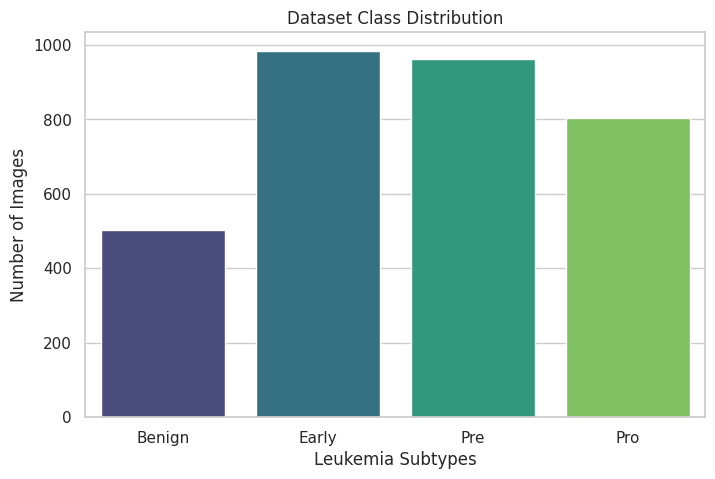

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Path
dataset_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Original/"
categories = ["Benign", "Early", "Pre", "Pro"]

# Count images in each category
data_distribution = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}

# Convert to DataFrame
df = pd.DataFrame(data_distribution.items(), columns=['Class', 'Image Count'])

# 🔹 Plot Class Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Image Count', data=df, palette='viridis')
plt.title("Dataset Class Distribution")
plt.xlabel("Leukemia Subtypes")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
#2️⃣ Sample Images from Each Class 🖼️

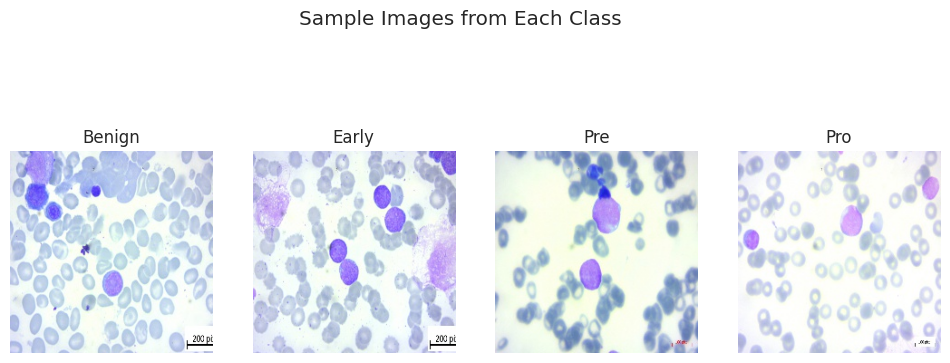

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Display a sample image from each class
fig, axes = plt.subplots(1, 4, figsize=(12, 5))

for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    img_name = os.listdir(category_path)[0]  # Pick first image
    img = cv2.imread(os.path.join(category_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis("off")

plt.suptitle("Sample Images from Each Class")
plt.show()


In [ ]:
#3️⃣ Statistical Analysis (Mean, Variance, Skewness) 📈

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-15-39268f981ac2>:14: RuntimeWarning: invalid value encountered in scalar power
  skew = np.mean((img - mean) ** 3) ** (1/3)  # Approximate skewness
100%|██████████| 100/100 [00:00<00:00, 430.61it/s]


                                                     Mean  \
Benign  [220.70553651147958, 231.52399553571428, 218.2...   
Early   [220.16936383928572, 213.10592713647958, 221.8...   
Pre     [217.74294483418367, 201.3551100127551, 201.70...   
Pro     [237.31397480867346, 235.96442522321428, 235.9...   

                                                 Variance  \
Benign  [952.8528041684691, 1127.3374344183474, 2026.8...   
Early   [1095.1755171016769, 1165.0707110425226, 1182....   
Pre     [1666.357113011625, 1376.5530662028207, 1555.7...   
Pro     [488.75573263839595, 495.5932616992873, 481.81...   

                                                 Skewness  
Benign  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  
Early   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  
Pre     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  
Pro     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  


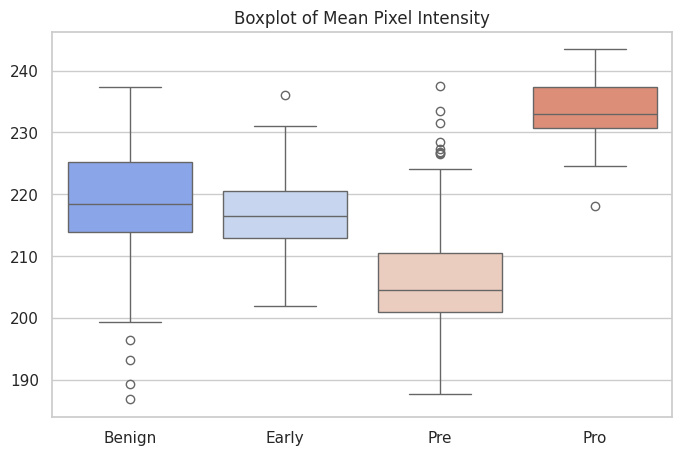

In [ ]:
import numpy as np
from tqdm import tqdm

# Function to compute image statistics
def get_image_stats(image_folder):
    means, variances, skewness = [], [], []

    for img_name in tqdm(os.listdir(image_folder)[:100]):  # Limit to 100 images for efficiency
        img = cv2.imread(os.path.join(image_folder, img_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (224, 224))

        mean = np.mean(img)
        variance = np.var(img)
        skew = np.mean((img - mean) ** 3) ** (1/3)  # Approximate skewness

        means.append(mean)
        variances.append(variance)
        skewness.append(skew)

    return means, variances, skewness

# Compute statistics for each class
image_stats = {}
for category in categories:
    path = os.path.join(dataset_path, category)
    image_stats[category] = get_image_stats(path)

# Convert to DataFrame
stats_df = pd.DataFrame(image_stats, index=["Mean", "Variance", "Skewness"]).T
print(stats_df)

# 🔹 Boxplot for Mean Pixel Intensity
plt.figure(figsize=(8, 5))
sns.boxplot(data=[image_stats[c][0] for c in categories], palette='coolwarm')
plt.xticks(range(len(categories)), categories)
plt.title("Boxplot of Mean Pixel Intensity")
plt.show()


In [ ]:
#4️⃣ Feature Correlation Heatmap 🔥

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-18-89ee01a02780>:23: RuntimeWarning: invalid value encountered in scalar power
  skew = np.mean((img - mean) ** 3) ** (1/3)  # Approximate skewness
100%|██████████| 100/100 [00:00<00:00, 313.88it/s]


              Mean     Variance  Skewness
Benign  218.395665  1064.146918       NaN
Early   216.621794  1186.132781       NaN
Pre     206.715473  1404.269913       NaN
Pro     233.749389   526.007121       NaN


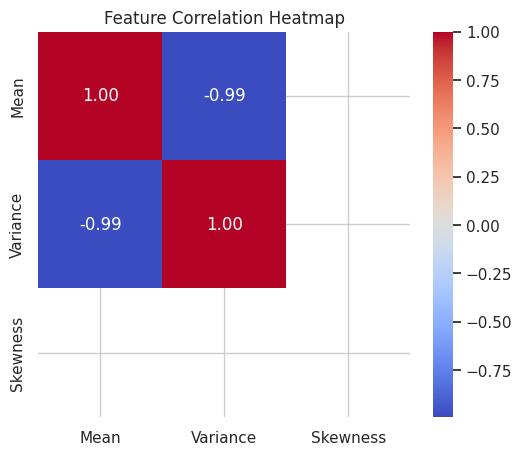

In [ ]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os

# Dataset Path
dataset_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Original/"
categories = ["Benign", "Early", "Pre", "Pro"]

# Function to compute mean, variance, and skewness for images in a folder
def get_image_stats(image_folder):
    means, variances, skewness = [], [], []

    for img_name in tqdm(os.listdir(image_folder)[:100]):  # Limit to 100 images for efficiency
        img = cv2.imread(os.path.join(image_folder, img_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (224, 224))  # Resize to 224x224

        mean = np.mean(img)
        variance = np.var(img)
        skew = np.mean((img - mean) ** 3) ** (1/3)  # Approximate skewness

        means.append(mean)
        variances.append(variance)
        skewness.append(skew)

    # Convert lists to scalar values (average of all images)
    return np.mean(means), np.mean(variances), np.mean(skewness)

# Compute statistics for each class
image_stats = {category: get_image_stats(os.path.join(dataset_path, category)) for category in categories}

# Convert dictionary to DataFrame
stats_df = pd.DataFrame(image_stats, index=["Mean", "Variance", "Skewness"]).T

# 🔹 Display the DataFrame
print(stats_df)

# 🔥 Heatmap for Feature Correlation
plt.figure(figsize=(6, 5))
sns.heatmap(stats_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

